In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("ggplot")

import re
import nltk

from sklearn.feature_extraction.text import TfidfVectorizer, TfidfTransformer, CountVectorizer
from nltk import sent_tokenize, word_tokenize
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, make_scorer

from time import time
import pickle

In [2]:
df = pd.read_csv(r"C:\Users\Madhavi\Downloads\dataset.csv")
df.head()

,headline,label
0,cock suck before you piss around on my work,-1
1,you are gay or antisemmitian archangel white ...,-1
2,fuck your filthy mother in the ass dry,-1
3,get fuck ed up get fuck ed up got a drink t...,-1
4,stupid peace of shit stop deleting my stuff ...,-1


In [3]:
df['label'].unique()

array([-1,  0], dtype=int64)

In [4]:
#Data Manpulation
def perform_data_manipulation():
    df = pd.read_csv(r"C:\Users\Madhavi\Downloads\dataset.csv")
    
    for index in df.index:
        if df.loc[index, "label"]==-1:
            df.loc[index, "label"] = 1
    return df

In [5]:
df = perform_data_manipulation()

In [6]:
df.head()

,headline,label
0,cock suck before you piss around on my work,1
1,you are gay or antisemmitian archangel white ...,1
2,fuck your filthy mother in the ass dry,1
3,get fuck ed up get fuck ed up got a drink t...,1
4,stupid peace of shit stop deleting my stuff ...,1


In [7]:

df['label'].unique()

array([1, 0], dtype=int64)

In [8]:
df.shape[0]

18148

In [9]:
def performdatadistribution(df):
    total = df.shape[0]
    num_non_toxic = df[df['label']==0].shape[0]
    
    slices = [num_non_toxic/total, (total-num_non_toxic)/total]
    
    labeling = ['Non-Toxic', 'Toxic']
    
    explode = [0.2, 0]
    
    plt.pie(slices, explode = explode, shadow=True, autopct="%1.1f%%", labels = labeling, wedgeprops={'edgecolor': 'black'})
    
    plt.title('Number of Toxic Vs Non- Toxic Test Sample')
    
    plt.tight_layout()
    
    plt.show()

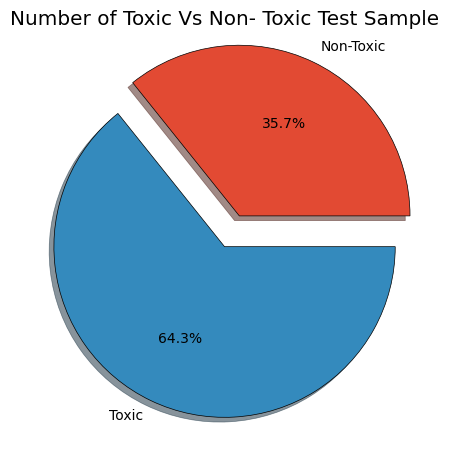

In [10]:
performdatadistribution(df)

In [11]:
def remove_pattern(input_txt, pattern):
    if (type(input_txt)==str):
        r = re.findall(pattern, input_txt)
        for i in r:
            input_txt = re.sub(i, '', input_txt)
        return input_txt
    else:
        return ""

In [12]:
df.head()

,headline,label
0,cock suck before you piss around on my work,1
1,you are gay or antisemmitian archangel white ...,1
2,fuck your filthy mother in the ass dry,1
3,get fuck ed up get fuck ed up got a drink t...,1
4,stupid peace of shit stop deleting my stuff ...,1


In [13]:
import pandas as pd
import numpy as np
import nltk

def remove_pattern(text, pattern):
    import re
    return re.sub(pattern, '', text)

def datasetCleaning(df):
    df['length_headline'] = df['headline'].str.len()
    
    # Correcting the concat function
    combined_df = pd.concat([df], ignore_index=True)  # ✅ Correct usage
    
    # Remove @user
    combined_df['tidy_tweet'] = np.vectorize(remove_pattern)(combined_df['headline'], "@[\\w]*")
    
    # Remove extra letters
    combined_df['tidy_tweet'] = combined_df['tidy_tweet'].str.replace("[^a-zA-Z#]", " ", regex=True)
    
    # Remove all words with size less than 3
    combined_df['tidy_tweet'] = combined_df['tidy_tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w) > 3]))
    
    combined_df['length_tidy_tweet'] = combined_df['tidy_tweet'].str.len()
    
    # Tokenization
    tokenized_tweet = combined_df['tidy_tweet'].apply(lambda x: x.split())
    
    nltk.download('wordnet')
    lemmatizer = nltk.stem.WordNetLemmatizer()
    
    tokenized_tweet = tokenized_tweet.apply(lambda x: [lemmatizer.lemmatize(i) for i in x])
    
    combined_df['tidy_tweet'] = tokenized_tweet.apply(lambda x: ' '.join(x))
    
    return combined_df, df

In [14]:
combined_df, df =datasetCleaning(df)

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Madhavi\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [15]:
combined_df.head()

,headline,label,length_headline,tidy_tweet,length_tidy_tweet
0,cock suck before you piss around on my work,1,44,cock suck before piss around work,33
1,you are gay or antisemmitian archangel white ...,1,624,antisemmitian archangel white tiger meow greet...,400
2,fuck your filthy mother in the ass dry,1,39,fuck your filthy mother,23
3,get fuck ed up get fuck ed up got a drink t...,1,121,fuck fuck drink that cant down fuck fuck fuck ...,51
4,stupid peace of shit stop deleting my stuff ...,1,93,stupid peace shit stop deleting stuff hole fal...,57


In [16]:
#Data splitting
from sklearn.model_selection import train_test_split

In [17]:
import pickle
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

def perform_data_split(x, y, combined_df, df):
    # Splitting the dataset
    X_train, X_test, Y_train, Y_test = train_test_split(
        combined_df['tidy_tweet'], combined_df['label'], test_size=x, random_state=y
    )

    print(f"Number of rows in the total dataset: {combined_df.shape[0]}")
    print(f"Number of rows in the training dataset: {X_train.shape[0]}")
    print(f"Number of rows in the testing dataset: {X_test.shape[0]}")

    # Reading stopwords file
    stopwords_path = r"C:\Users\Madhavi\Downloads\stopwords.txt"
    with open(stopwords_path, "r") as f:
        content_list = f.read().split("\n")

    # TF-IDF Vectorization
    tfidfvector = TfidfVectorizer(stop_words=content_list, lowercase=True)
    training_data = tfidfvector.fit_transform(X_train.values.astype("U"))
    testing_data = tfidfvector.transform(X_test.values.astype("U"))

    # Save the TF-IDF vocabulary
    filename = "tfidfvectorizer.pkl"
    pickle.dump(tfidfvector.vocabulary_, open(filename, "wb"))

    return X_train, X_test, Y_train, Y_test, testing_data, filename, training_data, content_list


In [18]:
X_train, X_test, Y_train, Y_test, testing_data, filename, training_data, content_list = perform_data_split(0.2,42,combined_df,df)

Number of rows in the total dataset: 18148
Number of rows in the training dataset: 14518
Number of rows in the testing dataset: 3630


C:\Users\Madhavi\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:406: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ninad'] not in stop_words.
  warnings.warn(


In [28]:
#Applying Machine Learning Algorithm
import time
import pickle
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score


In [29]:

def pipeline(X_train, Y_train, X_test, Y_test):
    MODELS = [
        LinearSVC(),
        LogisticRegression(),
        MultinomialNB(),
        DecisionTreeClassifier(),
        AdaBoostClassifier(),
        BaggingClassifier(),
        SGDClassifier()
    ]

    final_result = []  # Initialize the list to store results

    for model in MODELS:
        results = {}  # Reset results for each model
        results['Algorithm'] = model.__class__.__name__

        # Training
        start = time.time()
        print(f"Training {model.__class__.__name__}...")
        model.fit(X_train, Y_train)
        end = time.time()
        results['Training Time'] = end - start

        # Save the model
        filename = model.__class__.__name__ + ".pkl"
        pickle.dump(model, open(filename, "wb"))

        # Prediction
        start = time.time()
        prediction_test = model.predict(X_test)
        prediction_train = model.predict(X_train)
        end = time.time()
        results['Prediction Time'] = end - start

        # Metrics Calculation
        results['Accuracy : Test'] = accuracy_score(Y_test, prediction_test)
        results['Accuracy : Train'] = accuracy_score(Y_train, prediction_train)

        results['F1 Score : Test'] = f1_score(Y_test, prediction_test, average='weighted')
        results['F1 Score : Train'] = f1_score(Y_train, prediction_train, average='weighted')

        results['Precision : Test'] = precision_score(Y_test, prediction_test, average='weighted')
        results['Precision : Train'] = precision_score(Y_train, prediction_train, average='weighted')

        results['Recall : Test'] = recall_score(Y_test, prediction_test, average='weighted')
        results['Recall : Train'] = recall_score(Y_train, prediction_train, average='weighted')

        print(f"Training {model.__class__.__name__} finished in {results['Training Time']} sec")

        final_result.append(results.copy())  # Store results for each model

    return final_result


In [30]:
final_result = pipeline(training_data, Y_train, testing_data, Y_test)

Training LinearSVC...
Training LinearSVC finished in 0.06062960624694824 sec
Training LogisticRegression...
Training LogisticRegression finished in 0.15777230262756348 sec
Training MultinomialNB...
Training MultinomialNB finished in 0.010805606842041016 sec
Training DecisionTreeClassifier...
Training DecisionTreeClassifier finished in 4.401788949966431 sec
Training AdaBoostClassifier...


C:\Users\Madhavi\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Training AdaBoostClassifier finished in 3.0176632404327393 sec
Training BaggingClassifier...
Training BaggingClassifier finished in 30.237258434295654 sec
Training SGDClassifier...
Training SGDClassifier finished in 0.0632789134979248 sec


In [32]:
def performfinalresult(final_results):
    results = pd.DataFrame(final_results)

    # Reordering columns correctly
    results = results[['Algorithm', 'Accuracy : Test', 'Precision : Test', 'Recall : Test', 
                       'F1 Score : Test', 'Prediction Time', 'Accuracy : Train', 'Precision : Train', 
                       'Recall : Train', 'F1 Score : Train', 'Training Time']]
    
    # Sorting by 'F1 Score : Test' in descending order
    results = results.sort_values(by='F1 Score : Test', ascending=False)

    return results


In [33]:
results = performfinalresult(final_result)

In [35]:
results.head(10)

,Algorithm,Accuracy : Test,Precision : Test,Recall : Test,F1 Score : Test,Prediction Time,Accuracy : Train,Precision : Train,Recall : Train,F1 Score : Train,Training Time
6,SGDClassifier,0.905785,0.907186,0.905785,0.906210,0.000000,0.961565,0.961855,0.961565,0.961653,0.063279
1,LogisticRegression,0.901653,0.901365,0.901653,0.901470,0.002151,0.954333,0.954259,0.954333,0.954285,0.157772
0,LinearSVC,0.895868,0.896331,0.895868,0.896058,0.000000,0.986017,0.986033,0.986017,0.986023,0.060630
5,BaggingClassifier,0.889256,0.888670,0.889256,0.888736,0.166194,0.988153,0.988175,0.988153,0.988160,30.237258
3,DecisionTreeClassifier,0.881267,0.881140,0.881267,0.879698,0.031093,0.996280,0.996283,0.996280,0.996278,4.401789
4,AdaBoostClassifier,0.835537,0.867094,0.835537,0.838472,0.441522,0.836410,0.872800,0.836410,0.839915,3.017663
2,MultinomialNB,0.837466,0.845373,0.837466,0.830021,0.007858,0.913280,0.917581,0.913280,0.911033,0.010806


In [36]:
results.describe().loc[['min', 'max']]

,Accuracy : Test,Precision : Test,Recall : Test,F1 Score : Test,Prediction Time,Accuracy : Train,Precision : Train,Recall : Train,F1 Score : Train,Training Time
min,0.835537,0.845373,0.835537,0.830021,0.000000,0.83641,0.872800,0.83641,0.839915,0.010806
max,0.905785,0.907186,0.905785,0.906210,0.441522,0.99628,0.996283,0.99628,0.996278,30.237258


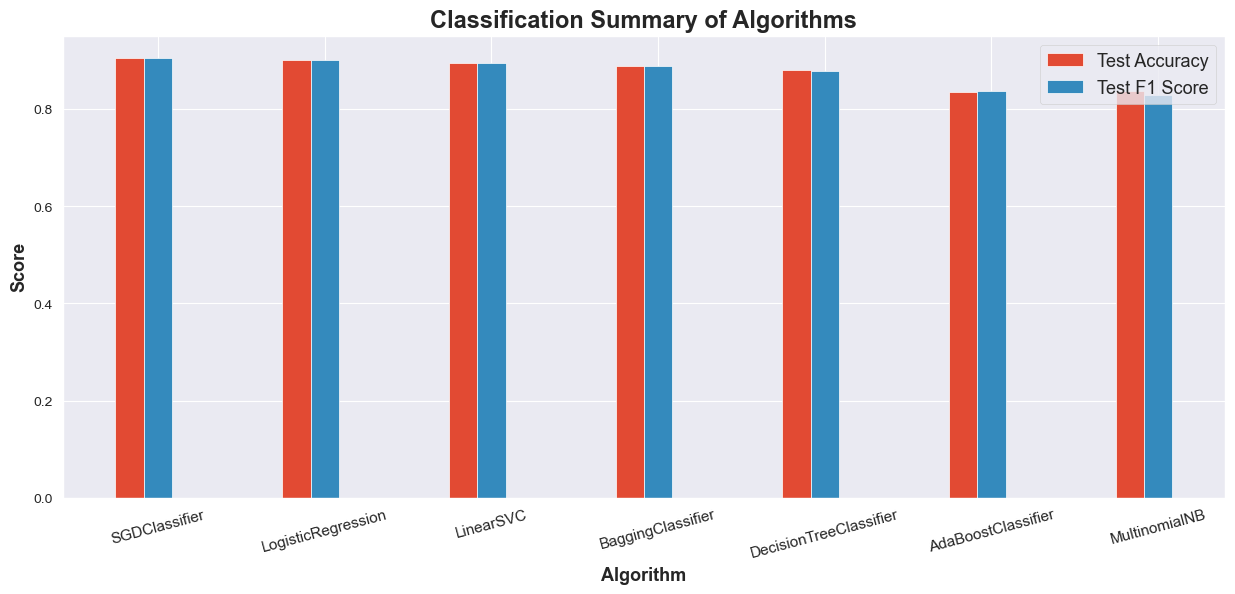

In [39]:
#Summary in graph
best_acc = results[results['Accuracy : Test'] == results['Accuracy : Test'].max()]
best_f1 = results[results['F1 Score : Test'] == results['F1 Score : Test'].max()]
best_precision = results[results['Precision : Test'] == results['Precision : Test'].max()]
best_recall = results[results['Recall : Test'] == results['Recall : Test'].max()]

sns.set_style('darkgrid')
plt.figure(figsize = (15, 6))

barWidth = 0.17
 
# set height of bar
bars1 = results['Accuracy : Test']
bars2 = results['F1 Score : Test']

# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]

# Make the plot
pal = sns.color_palette()
plt.bar(r1, bars1, color= pal[0], width=barWidth, edgecolor='white', label='Test Accuracy')
plt.bar(r2, bars2, color= pal[1], width=barWidth, edgecolor='white', label='Test F1 Score')

# Add xticks on the middle of the group bars
plt.xlabel('Algorithm', fontweight='bold', fontsize = 13)
plt.ylabel('Score', fontweight = 'bold', fontsize = 13)
plt.xticks([r + barWidth for r in range(len(bars1))], results['Algorithm'], rotation = 15, fontsize = 11)
 
# Create legend & Show graphic
plt.legend(fontsize = 13)

textstr = '\n'.join(['Best Accuracy: {:.3f} - {}'.format(best_acc['Accuracy : Test'].values[0], best_acc['Algorithm'].values[0]), 
                     'Best F1 Score: {:.3f} - {}'.format(best_f1['F1 Score : Test'].values[0], best_f1['Algorithm'].values[0])])
props = dict(boxstyle='round', facecolor='lightgrey', alpha=0.5)

plt.title('Classification Summary of Algorithms', fontweight = 'bold', fontsize = 17);

Text(0.5, 1.0, 'Training and Prediction time of Algorithms')

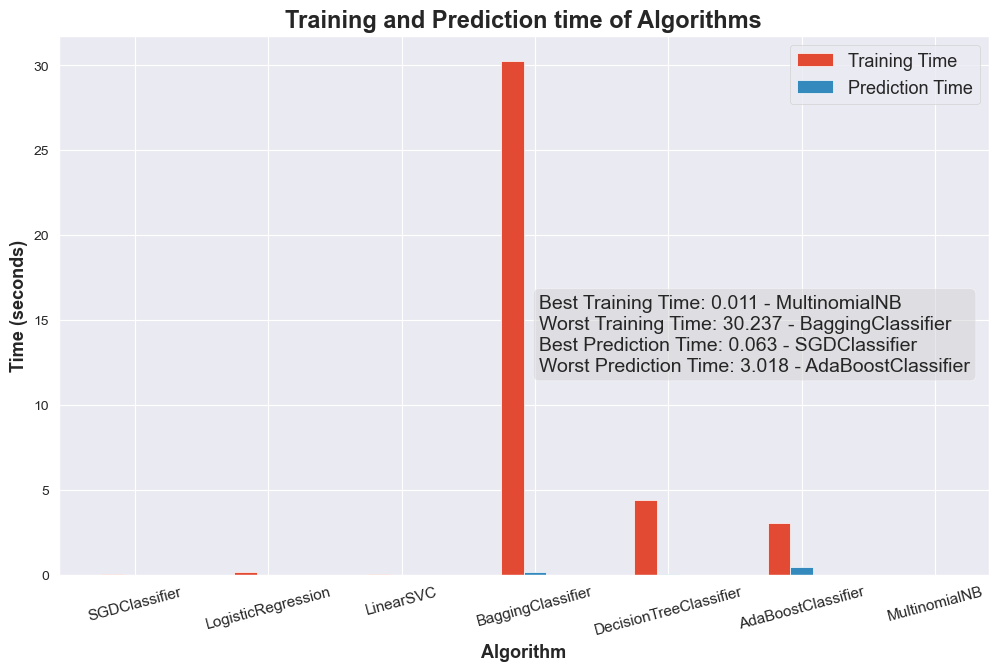

In [40]:
best_train_time = results[results['Training Time'] == results['Training Time'].min()]
worst_train_time = results[results['Training Time'] == results['Training Time'].max()]
best_prediction_time = results[results['Prediction Time'] == results['Prediction Time'].min()]
worst_prediction_time = results[results['Prediction Time'] == results['Prediction Time'].max()]

plt.figure(figsize = (12, 7))

barWidth = 0.17
 
# set height of bar
bars1 = results['Training Time']
bars2 = results['Prediction Time']
 
# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
 
# Make the plot
plt.bar(r1, bars1, color= pal[0], width=barWidth, edgecolor='white', label='Training Time')
plt.bar(r2, bars2, color= pal[1], width=barWidth, edgecolor='white', label='Prediction Time')
 
# Add xticks on the middle of the group bars
plt.xlabel('Algorithm', fontweight='bold', fontsize = 13)
plt.ylabel('Time (seconds)', fontweight = 'bold', fontsize = 13)
plt.xticks([r + barWidth for r in range(len(bars1))], results['Algorithm'], rotation = 15, fontsize = 11)


textstr = '\n'.join(('Best Training Time: {:.3f} - {}'.format(best_train_time['Training Time'].values[0], best_train_time['Algorithm'].values[0]), 
                     'Worst Training Time: {:.3f} - {}'.format(worst_train_time['Training Time'].values[0], worst_train_time['Algorithm'].values[0]),
                   'Best Prediction Time: {:.3f} - {}'.format(best_prediction_time['Training Time'].values[0], best_prediction_time['Algorithm'].values[0]), 
                    'Worst Prediction Time: {:.3f} - {}'.format(worst_prediction_time['Training Time'].values[0], worst_prediction_time['Algorithm'].values[0])))
props = dict(boxstyle='round', facecolor='lightgrey', alpha=0.5)

#place a text box
plt.text(3.2, 12, textstr, fontsize=14,  bbox=props) 

# Create legend & Show graphic
plt.legend(fontsize = 13)
plt.title('Training and Prediction time of Algorithms', fontweight = 'bold', fontsize = 17)

In [43]:
data = ["You are so beautiful"]

tfidf_vector = TfidfVectorizer(stop_words=content_list, lowercase=True, vocabulary=pickle.load(open(r"C:\Users\Madhavi\Machine Learning Projects\Cyber Bullying Detection System\tfidfvectorizer.pkl", "rb")))
preprocessed_data = tfidf_vector.fit_transform(data)

trained_model = pickle.load(open('LinearSVC.pkl', 'rb'))
print(trained_model.predict(preprocessed_data))

if(trained_model.predict(preprocessed_data)==1):
    print("bulling")
else:
    print("non-bulling")

[0]
non-bulling


C:\Users\Madhavi\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:406: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ninad'] not in stop_words.
  warnings.warn(


In [44]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, make_scorer

def tuning(clf, param_dict, X_train, y_train, X_test, y_test):
    grid_obj = GridSearchCV(clf, param_dict, scoring=make_scorer(f1_score), cv=5)
    best_clf = grid_obj.fit(X_train, y_train).best_estimator_
    
    best_prediction = best_clf.predict(X_test)
    
    print(f"{clf.__class__.__name__} | Best Params: {grid_obj.best_params_}")
    print(f"Accuracy: {accuracy_score(y_test, best_prediction):.4f} | "
          f"F1: {f1_score(y_test, best_prediction):.4f} | "
          f"Precision: {precision_score(y_test, best_prediction):.4f} | "
          f"Recall: {recall_score(y_test, best_prediction):.4f}")


In [47]:
param_grid = {
    'C': [0.25, 0.5, 0.75, 1, 1.2]
}

clf_model = LinearSVC()

tuning(clf_model, param_grid, training_data, Y_train, testing_data, Y_test)

LinearSVC | Best Params: {'C': 0.25}
Accuracy: 0.9011 | F1: 0.9211 | Precision: 0.9299 | Recall: 0.9125


In [48]:
pickle.dump(clf_model, open("LinearSVCTuned.pkl", "wb"))